In [22]:
library(arrow)
library(Seurat)

raw_data =read_feather('cellsAll.feather')


In [24]:
library(dplyr)
raw_data = as.matrix(raw_data) %>% as.data.frame()
rownames(raw_data) = raw_data$Gene
raw_data = raw_data[,-1]

In [25]:
metadata = read.table('rhesus_initial_meta.txt', header = TRUE, stringsAsFactors = FALSE, sep = ',', row.names = 1)
head(metadata)


,orig,bc,n_genes,n_counts,leiden,id,quality_BC
,<chr>,<chr>,<int>,<dbl>,<int>,<chr>,<chr>
AB1_0,AB1,AAAAAACCTGTC,1779,4373,4,AB1AAAAAACCTGTC,True
AB1_1,AB1,AAAAAGAGGCTA,660,1124,7,AB1AAAAAGAGGCTA,True
AB1_2,AB1,AAAAGACCTGTC,80,92,2,AB1AAAAGACCTGTC,False
AB1_3,AB1,AAAAGGCCGGGG,482,1016,4,AB1AAAAGGCCGGGG,True
AB1_4,AB1,AAAATTAGAGGA,1099,2276,4,AB1AAAATTAGAGGA,True
AB1_5,AB1,AAACAACAAATC,97,174,2,AB1AAACAACAAATC,True


In [26]:
raw_data = raw_data[colnames(raw_data) %in% rownames(metadata)]

In [27]:
seurat = CreateSeuratObject(raw_data)


In [28]:
seurat@meta.data = cbind(seurat@meta.data, metadata[colnames(seurat),])

In [29]:
seurat
seurat = subset(seurat, cells = colnames(seurat)[seurat$quality_BC == 'True'])
seurat = subset(seurat, cells = colnames(seurat)[seurat$nFeature_RNA > 100])
seurat

An object of class Seurat 
12565 features across 17412 samples within 1 assay 
Active assay: RNA (12565 features, 0 variable features)

An object of class Seurat 
12565 features across 13395 samples within 1 assay 
Active assay: RNA (12565 features, 0 variable features)

Centering and scaling data matrix

PC_ 1 
Positive:  ENSMMUG00000051300, AEBP1, ENSMMUG00000009038, ENSMMUG00000056922, IGHM, CD69, CD8A, ITGA6, ENSMMUG00000059973, ENSMMUG00000057074 
	   AKAP12, ABCB1, CR2, ZNF572, TSSK3, AKAP6, DDX3Y, ENSMMUG00000054699, CATSPERZ, SNED1 
	   CD28, SDR42E1, ENSMMUG00000058142, ENSMMUG00000061922, ENSMMUG00000056515, MYRIP, ENSMMUG00000064193, ENSMMUG00000051204, MYOM2, POU3F1 
Negative:  CD163, VCAN, CPVL, C5AR1, ENSMMUG00000054052, FN1, FCN1, CFD, CST3, CD93 
	   TREM1, SERPINA1, THBS1, LRP1, MPEG1, LYZ, TGFBI, PTGS2, LGALS3, IDO1 
	   AIF1, CSF1R, S100A8, ALDH1A1, IL13RA1, ENSMMUG00000001764, AOAH, SLC7A7, ANXA5, G0S2 
PC_ 2 
Positive:  VCAN, CD163, THBS1, FN1, C5AR1, FCN1, CPVL, CFD, SERPINA1, TREM1 
	   CD93, CST3, PTGS2, LRP1, ENSMMUG00000054052, IDO1, AIF1, TGFBI, S100A8, G0S2 
	   IL1B, ALDH1A1, SLC7A7, DUSP6, GLUL, AOAH, CSF3R, S100A9, CAMP, PILRA 
Negative:  MS4A1, CRIP1, CD1C, TMSB4X, KIAA0040, GPR183, CCDC50, ENSMMUG00000040771, RPS16, MAM

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13395
Number of edges: 464510

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8972
Number of communities: 6
Elapsed time: 3 seconds


17:53:53 UMAP embedding parameters a = 0.9922 b = 1.112

17:53:53 Read 13395 rows and found 30 numeric columns

17:53:53 Using Annoy for neighbor search, n_neighbors = 30

17:53:53 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:53:57 Writing NN index file to temp file C:\Users\dmorgan\AppData\Local\Temp\2\Rtmpgf83p6\file1ce43d90370b

17:53:57 Searching Annoy index using 1 thread, search_k = 3000

17:54:03 Annoy recall = 100%

17:54:04 Commencing smooth kNN distance calibration using 1 thread

17:54:07 Initializing from normalized Laplacian + noise

17:54:08 Commencing optimization for 200 epochs, with 630726 positive edges

17:54:39 Optimization finished



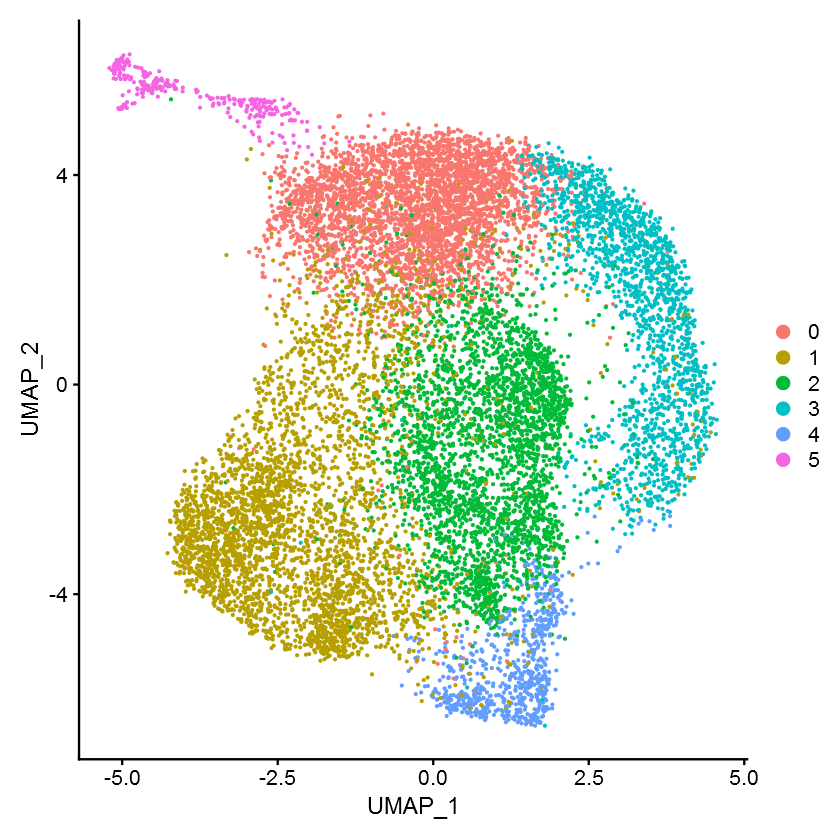

In [30]:
seurat <- NormalizeData(seurat, normalization.method = "LogNormalize", scale.factor = 10000)
seurat = FindVariableFeatures(seurat, selection.method = 'vst', nfeatures = 2000)
seurat = ScaleData(seurat, features = rownames(seurat))
seurat = RunPCA(seurat, features = VariableFeatures(seurat))
seurat = FindNeighbors(seurat, dims = 1:30)
seurat = FindClusters(seurat, resolution = .2)
seurat = RunUMAP(seurat, dims = 1:30)
DimPlot(seurat)

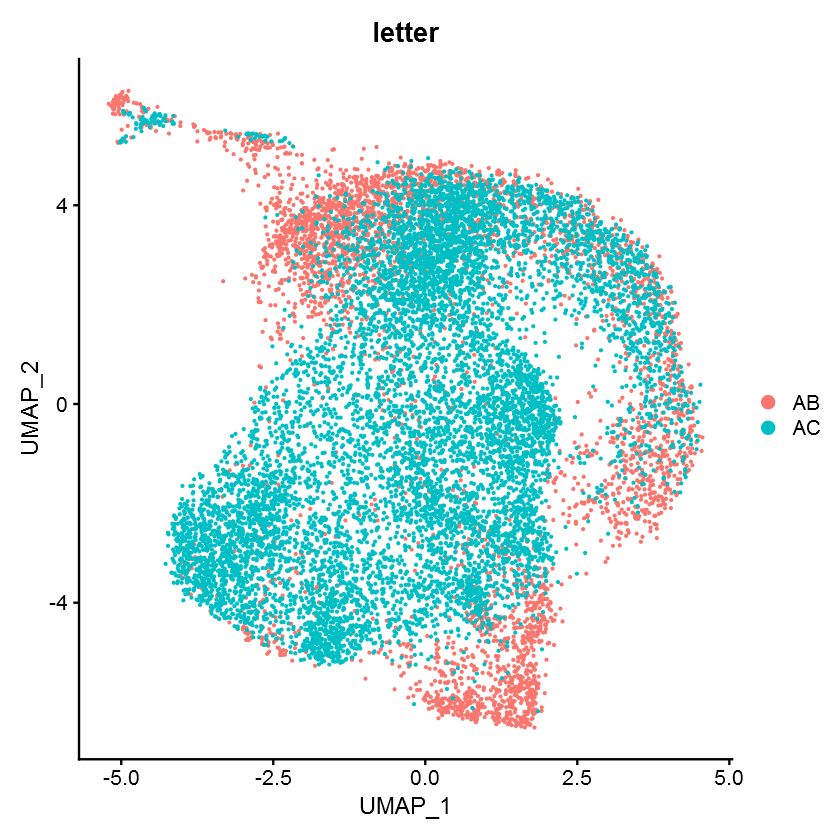

In [31]:
seurat$letter = substring(seurat$orig, 1,2)
DimPlot(seurat, group = 'letter')

In [32]:
write.csv(seurat@meta.data[seurat@meta.data$orig %in% c('AB1', 'AB2', 'AB3', "AB4"),], 'ab_cells.csv', quote = FALSE, col.names = TRUE)
write.csv(seurat@meta.data[seurat@meta.data$orig %in% c('AC1', 'AC2', 'AC3', "AC4", "AC5"),], 'ac_cells.csv', quote = FALSE, col.names = TRUE)

Warning message in write.csv(seurat@meta.data[seurat@meta.data$orig %in% c("AB1", :
"attempt to set 'col.names' ignored"
Warning message in write.csv(seurat@meta.data[seurat@meta.data$orig %in% c("AC1", :
"attempt to set 'col.names' ignored"


In [33]:
saveRDS(seurat, 'initialSeurat_rhesus.RDS')